# Data Exploration

In [1]:
import sys

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('src')

import dataprep

In [10]:
df = dataprep.df
df_test = dataprep.df_test
df_train = dataprep.df_train
df_train_balanced = dataprep.df_train_balanced

In [5]:
df

,id,location,membrane_or_soluable,is_test,sequence,sequence_limited,sequence_limited_length,sequence_length
0,Q9H400,Cell.membrane,M,True,"[M, G, L, P, V, S, W, A, P, P, A, L, W, V, L, ...","[M, G, L, P, V, S, W, A, P, P, A, L, W, V, L, ...",295,295
1,Q5I0E9,Cell.membrane,M,False,"[M, E, V, L, E, E, P, A, P, G, P, G, G, A, D, ...","[M, E, V, L, E, E, P, A, P, G, P, G, G, A, D, ...",566,566
2,P63033,Cell.membrane,M,False,"[M, M, K, T, L, S, S, G, N, C, T, L, N, V, P, ...","[M, M, K, T, L, S, S, G, N, C, T, L, N, V, P, ...",266,266
3,Q9NR71,Cell.membrane,M,False,"[M, A, K, R, T, F, S, N, L, E, T, F, L, I, F, ...","[M, A, K, R, T, F, S, N, L, E, T, F, L, I, F, ...",780,780
4,Q86XT9,Cell.membrane,M,False,"[M, G, N, C, Q, A, G, H, N, L, H, L, C, L, A, ...","[M, G, N, C, Q, A, G, H, N, L, H, L, C, L, A, ...",240,240
...,...,...,...,...,...,...,...,...
13853,V5NC32,Extracellular,S,False,"[M, F, P, R, V, V, R, L, N, S, R, L, V, S, F, ...","[M, F, P, R, V, V, R, L, N, S, R, L, V, S, F, ...",600,600
13854,P86368,Extracellular,S,False,"[S, L, L, E, F, G, M, M, I, L, E, E, T, G, K, ...","[S, L, L, E, F, G, M, M, I, L, E, E, T, G, K, ...",121,121
13855,P80156,Extracellular,S,False,"[T, K, C, Y, K, T, G, D, R, I, I, S, E, A, C, ...","[T, K, C, Y, K, T, G, D, R, I, I, S, E, A, C, ...",72,72
13856,Q8NIH1,Extracellular,S,False,"[M, H, G, L, L, L, A, A, A, G, L, L, S, L, P, ...","[M, H, G, L, L, L, A, A, A, G, L, L, S, L, P, ...",633,633


In [8]:
# Data Frame
df.keys()

Index(['id', 'location', 'membrane_or_soluable', 'is_test', 'sequence',
       'sequence_limited', 'sequence_limited_length', 'sequence_length'],
      dtype='object')

In [11]:
# Location Classification
df['location'].unique().tolist()

['Cell.membrane',
 'Cytoplasm',
 'Endoplasmic.reticulum',
 'Golgi.apparatus',
 'Lysosome/Vacuole',
 'Mitochondrion',
 'Nucleus',
 'Peroxisome',
 'Plastid',
 'Extracellular']

In [12]:
# Test Set Location Distribution
df_test[['id', 'location']].groupby(['location']).count()['id']

location
Cell.membrane            273
Cytoplasm                508
Endoplasmic.reticulum    173
Extracellular            393
Golgi.apparatus           70
Lysosome/Vacuole          64
Mitochondrion            302
Nucleus                  808
Peroxisome                30
Plastid                  152
Name: id, dtype: int64

In [13]:
# Train Set Location Distribution
df_train[['id', 'location']].groupby(['location']).count()['id']

location
Cell.membrane            1067
Cytoplasm                2034
Endoplasmic.reticulum     689
Extracellular            1580
Golgi.apparatus           286
Lysosome/Vacuole          257
Mitochondrion            1208
Nucleus                  3235
Peroxisome                124
Plastid                   605
Name: id, dtype: int64

In [14]:
# Balanced Train Set Location Distribution
df_train_balanced[['id', 'location']].groupby(['location']).count()['id']

location
Cell.membrane             423
Cytoplasm                 746
Endoplasmic.reticulum     253
Extracellular             621
Golgi.apparatus           286
Lysosome/Vacuole          257
Mitochondrion             480
Nucleus                  1261
Peroxisome                124
Plastid                   234
Name: id, dtype: int64

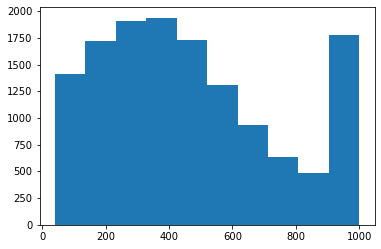

In [20]:
# Histogram of sequence length limited to 1000 max
plt.hist(df['sequence_limited_length'])
plt.show()